# <center> **Credit Card Customer Churn Analysis**

### <center> **Author: Yulia Shutko**

## Objectives

In this Notebook Explanotory Data Analysis (EDA) and Vizualisation Analysis are performed on the "Credit Card customers" data set [Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).

---

For this project different Python librarires are used for analysis and vizualisation. Libraries are imported prior furtherwork on the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Style and plot size are set

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

### ***1. Explanatory Data Analysis***

##### In this section EDA, including data load and cleaning, is performed.

As a first step, "Credit Card customers" data set is loaded into DataFrame

In [3]:
df = pd.read_csv('../Data/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


##### ***1.1 Initial data exploration***

*In the following subsection initial data set inspection is performed*

Here the shape and Info of DataFrame are shown

In [4]:
print(df.shape)
print(df.info())
print(df.dtypes)

(10127, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                               

As it can been, DataFrame consists of 10127 etries and 23 columns with following types:
* 7 float type
* 10 integer type
* and 6 object type 

In the next steps DataFrame is checked for any incosistencies(dublicates, missing value and etc.)

In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

as we can see above the DataFrame has no missing values. Let's check for duplicates:

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

And there are no duplicates. Initial data inspection shows that DataFrame has no missing values and duplicates, which simplifies further work with Data.

##### ***1.2 Data cleaning and preparation***

*In this subsection basic data cleaning and preparation for visualizations are performed*

Copy original DataFrame

In [7]:
df_cleaned = df.copy()

Fetching all columns names

In [8]:
df_cleaned.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

As it is shown above, there are 23 columns. Following columns are the solid foundation for futher analysis and visualizations:
* Customer information: Customer_Age, Gender, Dependent_count, Education_Level,      Marital_Status, Income_Category, Card_Category

* Account activity: Months_on_book, Months_Inactive_12_mon, Contacts_Count_12_mon

* Financial features: Credit_Limit, Total_Relationship_Count

* Target variable: Attrition_Flag (indicates whether a customer has churned)

10 columns can be dropped.

In [9]:
columns_to_drop = ['Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                   'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'] 
df_cleaned.drop(columns=columns_to_drop, inplace=True)


As far as analysis will done based on only demographical, financial and card activity information, and the column "CLIENTNUM" (client number) does not bring any valuable insights, therefore it can be dropped. 

In [10]:
df_cleaned

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0


In [11]:
df_cleaned.drop(columns=["CLIENTNUM"], inplace=True)
df_cleaned.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0


Below columns with categorical variables are checked for uniq names in order to inspect for errors. 

In [12]:
print(df_cleaned['Attrition_Flag'].unique())
print(df_cleaned['Gender'].unique())
print(df_cleaned['Education_Level'].unique())
print(df_cleaned['Marital_Status'].unique())
print(df_cleaned['Income_Category'].unique())
print(df_cleaned['Card_Category'].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


As it is shown above all all "categorical" columns gave no errors. But there variable names "Unknown" in different columns. Let's inspect this fact, probably there is sense to remove these entries.

In [13]:
print(df_cleaned.value_counts('Education_Level'))
print(df_cleaned.value_counts('Marital_Status'))
print(df_cleaned.value_counts('Income_Category'))


Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


In this case category "Unknow" is rather big to withdraw these entries in three inspected columns. Therefore "Unknown" is left untouched in the cleaned DataFrame.

For visualisations in this seaborn, plotly and matplotlib are used. Mentioned libraries can handle categorical variables (object or category) directly, therefore there is no need to use encoders for plots.

Again check the information of the prepared DataFrame.

In [14]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 1.0+ MB


And cleaned DataFrame is saved on GitHub repository

In [15]:
df_cleaned.to_csv('../Data/cleaned_data.csv', index=False)

As a conclusion of this subsection, cleaned DataFrame is ready for further analysis. No missing values or duplicates are found. All categorical variables are inspected for errors and no errors are found. There are some "Unknown" entries in three categorical columns, but these entries are not removed as they represent a significant part of the data in these columns.

---

### ***2. Visualization Analysis***

In this subsection visualisations and brief analysis are represented for Credit Card Churn data set. The traget variable is "Attrition_Flag".

But first it is necessary to split categorical and numerical columns in two lists.

In [16]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical columns:", categorical_cols) 
print("Numeric columns:", numeric_cols)

Categorical columns: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numeric columns: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit']


#####  ***2.1 Target variable distribution***

In this subsection distribution of target variable is depicted. For this purpose one Histogram plot is created.

C:\Users\julia\AppData\Local\Temp\ipykernel_29380\4265711910.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Attrition_Flag", data=df_cleaned, palette="Set2")


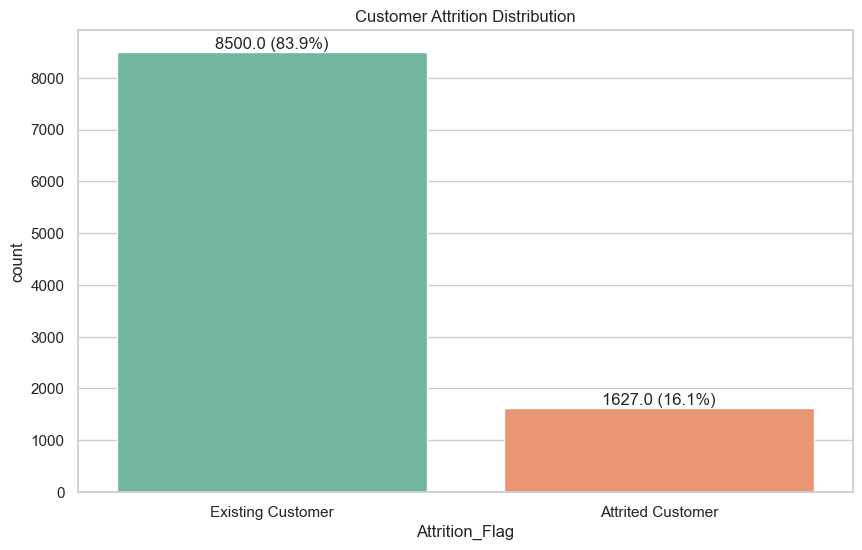

In [17]:
ax = sns.countplot(x="Attrition_Flag", data=df_cleaned, palette="Set2")
plt.title("Customer Attrition Distribution")
total = len(df_cleaned)

# Count + percentage labels
for container in ax.containers:
    labels = [f'{v.get_height()} ({v.get_height()/total:.1%})' for v in container]
    ax.bar_label(container, labels=labels)

plt.show()

Key conclusion:
* This plot shows distribution of the target variable. As it can be seen, there 8500 (or 83.9%) of existing customers, and 1627 (or 16,1%) churners.

##### ***2.2 Target vs Categorical variables***

For further analysis it is important to underst distribution of  different categorical variables, such as gender, education and etc. versus "Attrictionn_Flag". For this purpose several Histogram plots were created.

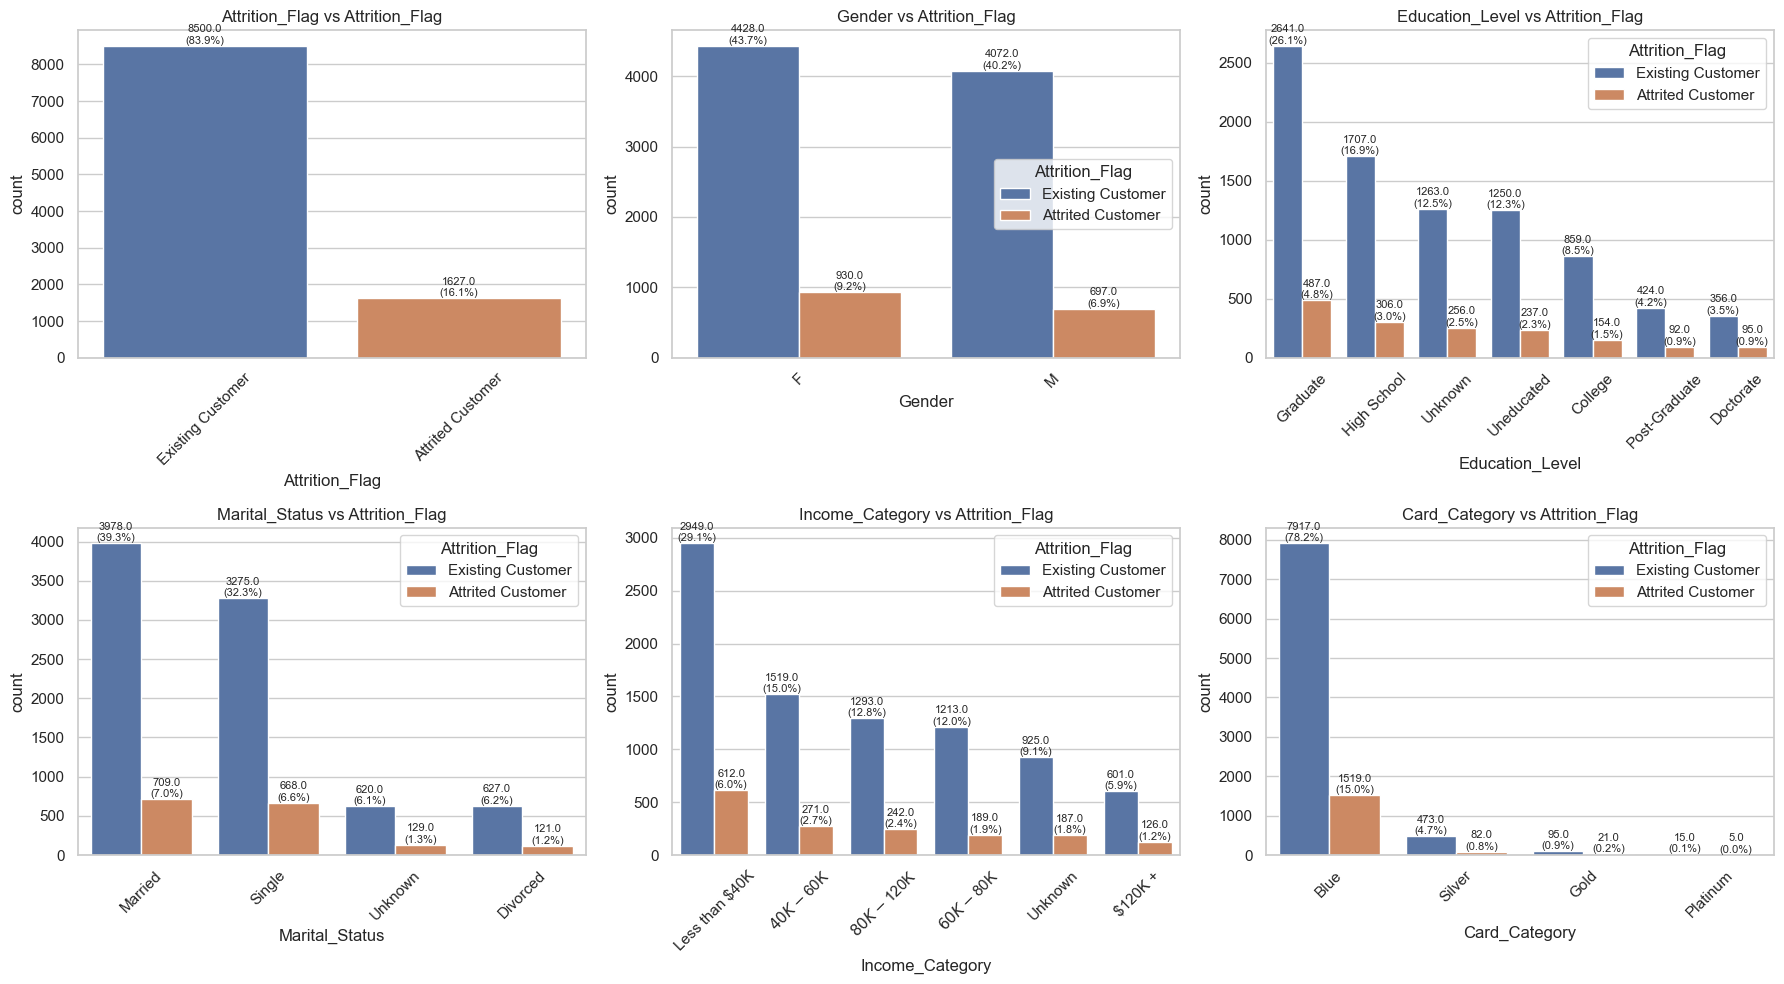

In [18]:
# Fige size and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

total = len(df_cleaned)  # for percentages
# List of categorical columns to plot
for i, col in enumerate(categorical_cols):
    ax = sns.countplot(
        x=col, 
        hue="Attrition_Flag", 
        data=df_cleaned, 
        order=df_cleaned[col].value_counts().index,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Attrition_Flag")
    axes[i].tick_params(axis='x', rotation=45)

    # Add count + percentage labels above bars
    for container in ax.containers:
        labels = [f'{v.get_height()}\n({v.get_height()/total:.1%})' 
                  if v.get_height() > 0 else '' 
                  for v in container]
        ax.bar_label(container, labels=labels, label_type="edge", fontsize=8)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key conclusions:
* Gender and marital status show little difference in churn proportion.
* Education and income levels don’t strongly determine churn, but majority groups naturally account for higher churn numbers.
* Blue card holders make up almost all churned customers — highlighting where retention efforts should focus.

#### ***2.3 Correlational Heatmaps for numerical categories*** 

In this section correlations of different numerical variables, such as Age, Credit Limit and etc., versus target varible are inspected.

For analysis it intersting to check correlations between different variables, wich can reveal very interesting insights. Below the Heatmap for existing customers is generated.

In [19]:
# In github the plotly chart is not be visible
# filter existing customers
df_existing = df_cleaned[df_cleaned["Attrition_Flag"] == "Existing Customer"]

# compute correlation matrix
corr_existing = df_existing[numeric_cols].corr()

# plot heatmap using plotly
fig = px.imshow(
    corr_existing,
    text_auto=True,       # show correlation values
    color_continuous_scale="RdBu_r",  # blue to red
    origin="lower",       # keep lower triangle aligned
    title="Correlation Heatmap - Existing Customers"
)
fig.show()

Key conclusions:
* Customer_Age & Months_on_book (0.79) → strong positive correlation.
Older customers have longer tenure.
* Dependent_count has slight negative correlation with both age (-0.12) and tenure (-0.10).
* Credit_Limit is nearly independent of age/tenure and only weakly linked to dependents (+0.07).
* Other variables (Credit_Limit, Contacts_Count_12_mon, Months_Inactive_12_mon, Total_Relationship_Count) show very low correlations with age, tenure, or dependents (values close to zero). Suggests these transactional/account features are largely independent from demographic ones.
* Within transaction-related features: correlations remain weak (near zero), indicating they capture different aspects of customer behavior.

Below the Correlation Heatmap for Attrited Customers is depicted.

In [20]:
# In github the plotly chart is not be visible
# filter attrited customers
df_attrited = df_cleaned[df_cleaned["Attrition_Flag"] == "Attrited Customer"]

# compute correlation matrix
corr_attrited = df_attrited[numeric_cols].corr()

# plot heatmap using plotly
fig = px.imshow(
    corr_attrited,
    text_auto=True,       # show correlation values
    color_continuous_scale="RdBu_r",  # blue to red
    origin="lower",       # keep lower triangle aligned
    title="Correlation Heatmap - Attrited Customers"
)
fig.show()

Key conclusions:
* Customer_Age & Months_on_book (0.77) → still strongly correlated, similar to existing customers.
* Dependent_count shows a stronger negative correlation with both age (-0.16) and tenure (-0.14).
* Credit_Limit relationships (~0.03–0.04): slightly stronger correlations with age and tenure compared to existing customers, though still weak. Could suggest attrited customers’ credit limits rise modestly with age/tenure.
* Transaction features (Contacts_Count_12_mon, Months_Inactive_12_mon, Total_Relationship_Count): correlations remain very weak, near zero, similar to existing customers. Indicates they capture distinct behaviors not directly tied to demographics.

To compare two correlation groups (existing customers and attrited), the the Differense in correlation Heatmap is generated. 

In [21]:
# In github the plotly chart is not be visible
diff_corr = corr_existing - corr_attrited # difference in correlations

# Heatmap generation
fig = px.imshow(
    diff_corr,
    text_auto=True,       # show correlation values
    color_continuous_scale="RdBu_r",  # blue to red
    origin="lower",       # keep lower triangle aligned
    title="Correlation Heatmap - Difference (Existing - Attrited)"
)
fig.show()

Key conclusions:
* The age–tenure relationship is consistent across churned and retained customers, therefore is not a churn differentiator.
* Overall, differences are small (±0.05): churn status does not drastically change correlation structures.
* Dependent_count correlations with other features (e.g., Age, Tenure) show positive differences (~+0.04–0.05): indicates stronger negative relationships in attrited customers (since Existing – Attrited = positive difference).
* Credit Limit and Contacts Count differences are close to zero, meaning their correlations with other features do not shift much between groups.
* Inactivity matters: the biggest correlation shifts involve Inactive Period, highlighting it as a potentially strong churn indicator.


#### ***2.4 Inactive Months versus Attriction Flag*** 

In previous section, it was concluded that inacrtive period is the very strong predictor for churn. Below a distribution of inactive period versus attriction is shown. For this purpose a histogram plot was generated.

In [22]:
fig = px.histogram(df_cleaned, x="Months_Inactive_12_mon", color="Attrition_Flag", marginal="box",title="Inactive Months Distribution by Attrition Flag") 
fig.show() # In github the plotly chart is not be visible

Key conclusions:
* Inactivity is a strong churn signal: Attrited customers are generally more inactive, with higher medians and more outliers.
* Retention opportunity: Customers drifting into 4+ inactive months are at high risk and could be targeted for reactivation campaigns.
* Behavior differentiation: While inactivity exists in both groups, the heavier tail in churned customers suggests inactivity duration is a leading churn driver.

---

### ***3. Analysis Key Findings***

The analysis of the BankChurners dataset shows that customer churn affects about 16% of the population, with attrition concentrated almost entirely among Blue card holders, while premium card customers (Gold and Platinum) remain largely loyal. Behavioral factors, especially inactivity, stand out as the strongest churn predictor: attrited customers record higher inactive months, greater variability, and more frequent outliers compared to existing customers. Customers with dependents also appear more vulnerable, particularly younger individuals with shorter tenure.

In contrast, demographic attributes such as gender, marital status, education, and income show little difference in churn rates, and credit limit or relationship counts provide only weak signals. Correlation analysis confirms that the age–tenure link is strong for all customers but slightly weaker among those who attrited, while differences in inactivity and dependents emerge as the most important distinguishing patterns. These insights highlight that churn is driven less by static demographics and more by behavioral patterns of account activity.

---

### ***Conclusion***

In this project, we conducted an Exploratory Data Analysis (EDA) on the BankChurners dataset to better understand the factors driving credit card customer attrition (churn).
The analysis included:

* Data inspection & cleaning: preparing categorical and numerical features for analysis.
* Univariate analysis: target variable (Attrition_Flag) distribution.
* Bivariate analysis: exploring relationships between features and churn (Attrition_Flag).
* Correlation analysis: comparing numerical relationships across existing and attrited customers.
* Group comparisons: using difference heatmaps to highlight how patterns shift with churn.
* Visualization: interactive and static plots to present insights clearly.

---